In [59]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel
import scipy.stats as stats

#### DJI de los últimos 20 años

In [2]:
DJI_data_d = pd.read_csv("Dataset/DJI - 2000 - 2020.csv")

In [116]:
DJI_datat = DJI_data_d.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
DJI_data = DJI_datat.round(2)
DJI_data

,Date,Adj Close
0,2000-01-03,11357.51
1,2000-01-04,10997.93
2,2000-01-05,11122.65
3,2000-01-06,11253.26
4,2000-01-07,11522.56
...,...,...
5026,2019-12-24,28515.45
5027,2019-12-26,28621.39
5028,2019-12-27,28645.26
5029,2019-12-30,28462.14


#### *Close price adjusted for splits.**Adjusted close price adjusted for both dividends and splits.

Industry:
- Conglomerate: 3M, Honeywell
- Financial services: American Express, Goldman Sachs, JP Morgan Chase, The Travelers Companies, Visa
- Pharma - Health Care: Amgen, Johnson & Johnson, Merck, UnitedHealth Group
- IT - Telecom: Apple, Cisco, IBM, Intel, Microsoft, Salesforce, Verizon
- Consumer goods - food: Coca-Cola, McDonalds, Procter & Gamble
- Retail - Apparel: The Home Depot, Nike, Walgreens, Walmart
- Aerospace: Boeing
- Construction, Petrol & Chemical: Caterpillar, Chevron, Dow
- Entertainment: Disney

#### Dataframe de las 30 compañías con su precio por día

In [4]:
companies_data = yf.download("MMM AXP AMGN AAPL BA CAT CVX CSCO KO DOW GS HD HON IBM INTC JNJ JPM MCD MRK MSFT NKE PG CRM TRV UNH VZ V WBA WMT DIS", 
                   start="2000-01-01", 
                   end="2020-01-01"
                  ).drop(['Open', 'Close', 'High', 'Low', 'Volume'], axis=1)

companies_data.columns = companies_data.columns.droplevel()
companies_data = companies_data.reset_index()
colummna_companies = ['Date', 'AAPL price', 'AMGN price', 'AXP price', 'BA price', 'CAT price', 'CRM price', 'CSCO price', 'CVX price', 'DIS price', 'DOW price',
       'GS price', 'HD price', 'HON price', 'IBM price', 'INTC price', 'JNJ price', 'JPM price', 'KO price', 'MCD price', 'MMM price',
       'MRK price', 'MSFT price', 'NKE price', 'PG price', 'TRV price', 'UNH price', 'V price', 'VZ price', 'WBA price', 'WMT price']
companies_data.columns = colummna_companies

columns_index = companies_data.columns[1:]

for column in columns_index:
    i=0
    first_value = companies_data[column][i]
    while pd.isnull(first_value):
        i+=1
        first_value = companies_data[column][i]
    new_column = column.split(' ')[0] + ' index'
    companies_data[new_column] = companies_data[column].apply(lambda x: x / first_value).round(2)
    companies_data[column] = companies_data[column].round(2)

companies_data

[*********************100%***********************]  30 of 30 completed


,Date,AAPL price,AMGN price,AXP price,BA price,CAT price,CRM price,CSCO price,CVX price,DIS price,...,MRK index,MSFT index,NKE index,PG index,TRV index,UNH index,V index,VZ index,WBA index,WMT index
0,1999-12-31,0.79,47.88,36.35,26.54,11.31,NaN,40.38,17.28,22.63,...,1.00,1.00,1.00,1.00,1.00,1.00,NaN,1.00,1.00,1.00
1,2000-01-03,0.86,50.17,34.38,25.74,11.69,NaN,40.73,16.68,23.12,...,1.01,1.00,0.97,0.98,0.98,1.01,NaN,0.97,0.98,0.97
2,2000-01-04,0.78,46.34,33.09,25.70,11.54,NaN,38.45,16.68,24.47,...,0.97,0.96,0.92,0.96,0.97,1.00,NaN,0.94,0.94,0.93
3,2000-01-05,0.79,47.93,32.24,27.30,11.81,NaN,38.33,16.98,25.48,...,1.01,0.97,0.97,0.94,0.96,1.00,NaN,0.97,0.95,0.91
4,2000-01-06,0.73,48.73,32.90,27.58,12.41,NaN,37.69,17.70,24.47,...,1.02,0.94,0.97,0.98,0.98,1.03,NaN,0.97,0.92,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,2019-12-24,69.89,235.81,122.55,331.03,143.17,163.25,46.19,113.89,145.29,...,2.88,4.19,53.29,3.90,6.74,52.10,14.45,2.72,2.69,2.50
5031,2019-12-26,71.27,235.39,123.21,327.97,143.89,164.51,46.26,114.13,145.70,...,2.88,4.22,53.59,3.90,6.76,52.29,14.57,2.72,2.72,2.50
5032,2019-12-27,71.25,235.03,122.99,328.19,143.94,164.98,46.18,113.85,145.75,...,2.88,4.23,54.05,3.93,6.78,52.35,14.59,2.73,2.72,2.50
5033,2019-12-30,71.67,233.81,122.12,324.47,143.21,162.44,46.01,113.42,143.77,...,2.87,4.20,53.64,3.88,6.77,51.97,14.47,2.72,2.72,2.50


#### Data companies by sector

#### Pongo droplevel para quitar multiindice. Así de esta manera sigo teniendo 1o el Adj Close y 2o Volume. Acordarse de esto

In [5]:
#importamos file de la libreria

conglomerate_data = yf.download("MMM HON", 
                   start="2000-01-01", 
                   end="2020-01-01"
                  ).drop(['Open', 'Close', 'High', 'Low', 'Volume'], axis=1)
col_names = ['Date', 'HON price', 'MMM price']
conglomerate_data.columns = conglomerate_data.columns.droplevel()
conglomerate_data = conglomerate_data.reset_index()
conglomerate_data.columns = col_names

#añadimos columnas de index

col_cong_index = conglomerate_data.columns[1:]

for column in col_cong_index:
    i=0
    first_value = conglomerate_data[column][i]
    while pd.isnull(first_value):
        i+=1
        first_value = conglomerate_data[column][i]
    new_column = column.split(' ')[0] + ' index'
    conglomerate_data[new_column] = conglomerate_data[column].apply(lambda x: x / first_value).round(2)
    conglomerate_data[column] = conglomerate_data[column].round(2)

#añadimos resultado de index

conglomerate_data['Result index'] = ((conglomerate_data['HON index'] + conglomerate_data['MMM index']) / 2).round(2)

conglomerate_data

[*********************100%***********************]  2 of 2 completed


,Date,HON price,MMM price,HON index,MMM index,Result index
0,1999-12-31,33.98,28.85,1.00,1.00,1.00
1,2000-01-03,33.39,27.82,0.98,0.96,0.97
2,2000-01-04,32.80,26.71,0.97,0.93,0.95
3,2000-01-05,32.36,27.48,0.95,0.95,0.95
4,2000-01-06,32.98,29.69,0.97,1.03,1.00
...,...,...,...,...,...,...
5027,2019-12-24,172.29,170.34,5.07,5.90,5.48
5028,2019-12-26,172.85,170.25,5.09,5.90,5.50
5029,2019-12-27,172.46,170.90,5.08,5.92,5.50
5030,2019-12-30,172.40,169.52,5.07,5.88,5.48


#### Dataframe sector finance

In [6]:
finance_data = yf.download("AXP GS JPM TRV V", 
                   start="2000-01-01", 
                   end="2020-01-01"
                  ).drop(['Open', 'Close', 'High', 'Low', 'Volume'], axis=1)
finance_data.columns = finance_data.columns.droplevel()
finance_data = finance_data.reset_index()
col_names1 = ['Date', 'AXP price', 'GS price', 'JPM price', 'TRV price', 'V price']
finance_data.columns = col_names1

col_fin_index = finance_data.columns[1:]

for column in col_fin_index:
    i=0
    first_value = finance_data[column][i]
    while pd.isnull(first_value):
        i+=1
        first_value = finance_data[column][i]
    new_column = column.split(' ')[0] + ' index'
    finance_data[new_column] = finance_data[column].apply(lambda x: x / first_value).round(2)
    finance_data[column] = finance_data[column].round(2)

finance_data['Result index'] = ((finance_data['AXP index'] + finance_data['GS index'] + finance_data['JPM index'] + finance_data['TRV index']) / 4).round(2)

finance_data

[*********************100%***********************]  5 of 5 completed


,Date,AXP price,GS price,JPM price,TRV price,V price,AXP index,GS index,JPM index,TRV index,V index,Result index
0,1999-12-31,36.35,74.10,27.77,19.75,NaN,1.00,1.00,1.00,1.00,NaN,1.00
1,2000-01-03,34.38,69.48,26.05,19.35,NaN,0.95,0.94,0.94,0.98,NaN,0.95
2,2000-01-04,33.09,65.10,25.48,19.09,NaN,0.91,0.88,0.92,0.97,NaN,0.92
3,2000-01-05,32.24,62.05,25.32,18.94,NaN,0.89,0.84,0.91,0.96,NaN,0.90
4,2000-01-06,32.90,64.71,25.68,19.31,NaN,0.91,0.87,0.92,0.98,NaN,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...
5027,2019-12-24,122.55,225.73,132.76,133.04,186.42,3.37,3.05,4.78,6.74,14.45,4.48
5028,2019-12-26,123.21,227.00,134.17,133.49,188.00,3.39,3.06,4.83,6.76,14.57,4.51
5029,2019-12-27,122.99,226.46,134.26,133.99,188.23,3.38,3.06,4.83,6.78,14.59,4.51
5030,2019-12-30,122.12,225.62,133.77,133.69,186.68,3.36,3.04,4.82,6.77,14.47,4.50


#### Dataframe sector pharma

In [7]:
pharma_data = yf.download("AMGN JNJ MRK UNH", 
                   start="2000-01-01", 
                   end="2020-01-01"
                  ).drop(['Open', 'Close', 'High', 'Low', 'Volume'], axis=1)
pharma_data.columns = pharma_data.columns.droplevel()
pharma_data = pharma_data.reset_index()
col_names2 = ['Date', 'AMGN price', 'JNJ price', 'MRK price', 'UNH price']
pharma_data.columns = col_names2

col_pha_index = pharma_data.columns[1:]

for column in col_pha_index:
    i=0
    first_value = pharma_data[column][i]
    while pd.isnull(first_value):
        i+=1
        first_value = pharma_data[column][i]
    new_column = column.split(' ')[0] + ' index'
    pharma_data[new_column] = pharma_data[column].apply(lambda x: x / first_value).round(2)
    pharma_data[column] = pharma_data[column].round(2)

pharma_data['Result index'] = ((pharma_data['AMGN index'] + pharma_data['JNJ index'] + pharma_data['MRK index'] + pharma_data['UNH index']) / 4).round(2)

pharma_data

[*********************100%***********************]  4 of 4 completed


,Date,AMGN price,JNJ price,MRK price,UNH price,AMGN index,JNJ index,MRK index,UNH index,Result index
0,1999-12-31,47.88,27.29,31.01,5.58,1.00,1.00,1.00,1.00,1.00
1,2000-01-03,50.17,26.98,31.21,5.65,1.05,0.99,1.01,1.01,1.01
2,2000-01-04,46.34,25.99,30.12,5.58,0.97,0.95,0.97,1.00,0.97
3,2000-01-05,47.93,26.26,31.30,5.56,1.00,0.96,1.01,1.00,0.99
4,2000-01-06,48.73,27.09,31.56,5.77,1.02,0.99,1.02,1.03,1.01
...,...,...,...,...,...,...,...,...,...,...
5027,2019-12-24,235.81,142.07,89.33,290.81,4.92,5.21,2.88,52.10,16.28
5028,2019-12-26,235.39,141.97,89.23,291.91,4.92,5.20,2.88,52.29,16.32
5029,2019-12-27,235.03,141.89,89.38,292.23,4.91,5.20,2.88,52.35,16.34
5030,2019-12-30,233.81,141.45,88.93,290.13,4.88,5.18,2.87,51.97,16.23


#### Dataframe sector IT

In [8]:
it_data = yf.download("AAPL CSCO IBM INTC MSFT CRM VZ", 
                   start="2000-01-01", 
                   end="2020-01-01"
                  ).drop(['Open', 'Close', 'High', 'Low', 'Volume'], axis=1)
it_data.columns = it_data.columns.droplevel()
it_data = it_data.reset_index()
col_names3 = ['Date', 'AAPL price', 'CRM price', 'CSCO price', 'IBM price', 'INTC price', 'MSFT price', 'VZ price']
it_data.columns = col_names3

col_it_index = it_data.columns[1:]

for column in col_it_index:
    i=0
    first_value = it_data[column][i]
    while pd.isnull(first_value):
        i+=1
        first_value = it_data[column][i]
    new_column = column.split(' ')[0] + ' index'
    it_data[new_column] = it_data[column].apply(lambda x: x / first_value).round(2)
    it_data[column] = it_data[column].round(2)

it_data['Result index'] = ((it_data['AAPL index'] + it_data['CSCO index'] + it_data['IBM index'] + it_data['INTC index'] + it_data['MSFT index'] + it_data['VZ index']) / 6).round(2)

it_data

[*********************100%***********************]  7 of 7 completed


,Date,AAPL price,CRM price,CSCO price,IBM price,INTC price,MSFT price,VZ price,AAPL index,CRM index,CSCO index,IBM index,INTC index,MSFT index,VZ index,Result index
0,1999-12-31,0.79,NaN,40.38,67.52,25.86,37.16,21.59,1.00,NaN,1.00,1.00,1.00,1.00,1.00,1.00
1,2000-01-03,0.86,NaN,40.73,72.60,27.33,37.10,21.02,1.09,NaN,1.01,1.08,1.06,1.00,0.97,1.03
2,2000-01-04,0.78,NaN,38.45,70.14,26.06,35.85,20.34,1.00,NaN,0.95,1.04,1.01,0.96,0.94,0.98
3,2000-01-05,0.79,NaN,38.33,72.60,26.27,36.23,21.02,1.01,NaN,0.95,1.08,1.02,0.97,0.97,1.00
4,2000-01-06,0.73,NaN,37.69,71.35,24.74,35.01,20.91,0.92,NaN,0.93,1.06,0.96,0.94,0.97,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,2019-12-24,69.89,163.25,46.19,128.25,57.97,155.73,58.71,88.98,37.97,1.14,1.90,2.24,4.19,2.72,16.86
5028,2019-12-26,71.27,164.51,46.26,128.19,58.37,157.01,58.72,90.74,38.26,1.15,1.90,2.26,4.22,2.72,17.17
5029,2019-12-27,71.25,164.98,46.18,128.53,58.62,157.29,58.95,90.71,38.37,1.14,1.90,2.27,4.23,2.73,17.16
5030,2019-12-30,71.67,162.44,46.01,126.19,58.17,155.94,58.64,91.25,37.78,1.14,1.87,2.25,4.20,2.72,17.24


#### Dataframe sector consumer goods

In [9]:
consumergoods_data = yf.download("KO MCD PG", 
                   start="2000-01-01", 
                   end="2020-01-01"
                  ).drop(['Open', 'Close', 'High', 'Low', 'Volume'], axis=1)
consumergoods_data.columns = consumergoods_data.columns.droplevel()
consumergoods_data = consumergoods_data.reset_index()
col_names4 = ['Date', 'KO price', 'MCD price', 'PG price']
consumergoods_data.columns = col_names4

col_cons_index = consumergoods_data.columns[1:]

for column in col_cons_index:
    i=0
    first_value = consumergoods_data[column][i]
    while pd.isnull(first_value):
        i+=1
        first_value = consumergoods_data[column][i]
    new_column = column.split(' ')[0] + ' index'
    consumergoods_data[new_column] = consumergoods_data[column].apply(lambda x: x / first_value).round(2)
    consumergoods_data[column] = consumergoods_data[column].round(2)

consumergoods_data['Result index'] = ((consumergoods_data['KO index'] + consumergoods_data['MCD index'] + consumergoods_data['PG index']) / 3).round(2)

consumergoods_data

[*********************100%***********************]  3 of 3 completed


,Date,KO price,MCD price,PG price,KO index,MCD index,PG index,Result index
0,1999-12-31,12.20,23.93,31.30,1.00,1.00,1.00,1.00
1,2000-01-03,11.81,23.52,30.63,0.97,0.98,0.98,0.98
2,2000-01-04,11.82,23.04,30.04,0.97,0.96,0.96,0.96
3,2000-01-05,11.93,23.41,29.46,0.98,0.98,0.94,0.97
4,2000-01-06,11.94,23.08,30.82,0.98,0.96,0.98,0.97
...,...,...,...,...,...,...,...,...
5028,2019-12-24,53.31,193.02,122.20,4.37,8.07,3.90,5.45
5029,2019-12-26,53.62,193.41,122.20,4.39,8.08,3.90,5.46
5030,2019-12-27,53.94,194.50,123.05,4.42,8.13,3.93,5.49
5031,2019-12-30,53.86,193.26,121.47,4.41,8.08,3.88,5.46


#### Dataframe sector retail

In [10]:
retail_data = yf.download("HD NKE WBA WMT", 
                   start="2000-01-01", 
                   end="2020-01-01"
                  ).drop(['Open', 'Close', 'High', 'Low', 'Volume'], axis=1)
retail_data.columns = retail_data.columns.droplevel()
retail_data = retail_data.reset_index()
col_names5 = ['Date', 'HD price', 'NKE price', 'WBA price', 'WMT price']
retail_data.columns = col_names5

col_ret_index = retail_data.columns[1:]

for column in col_ret_index:
    i=0
    first_value = retail_data[column][i]
    while pd.isnull(first_value):
        i+=1
        first_value = retail_data[column][i]
    new_column = column.split(' ')[0] + ' index'
    retail_data[new_column] = retail_data[column].apply(lambda x: x / first_value).round(2)
    retail_data[column] = retail_data[column].round(2)

retail_data['Result index'] = ((retail_data['HD index'] + retail_data['NKE index'] + retail_data['WBA index'] + retail_data['WMT index']) / 4).round(2)

retail_data

[*********************100%***********************]  4 of 4 completed


,Date,HD price,NKE price,WBA price,WMT price,HD index,NKE index,WBA index,WMT index,Result index
0,1999-12-31,45.42,1.87,20.76,47.13,1.00,1.00,1.00,1.00,1.00
1,2000-01-03,43.06,1.81,20.27,45.56,0.95,0.97,0.98,0.97,0.97
2,2000-01-04,40.79,1.71,19.52,43.85,0.90,0.92,0.94,0.93,0.92
3,2000-01-05,41.62,1.81,19.74,42.96,0.92,0.97,0.95,0.91,0.94
4,2000-01-06,39.64,1.80,19.16,43.43,0.87,0.97,0.92,0.92,0.92
...,...,...,...,...,...,...,...,...,...,...
5028,2019-12-24,216.76,99.39,55.88,117.98,4.77,53.29,2.69,2.50,15.81
5029,2019-12-26,216.91,99.96,56.41,117.99,4.78,53.59,2.72,2.50,15.90
5030,2019-12-27,216.07,100.81,56.52,118.06,4.76,54.05,2.72,2.50,16.01
5031,2019-12-30,213.46,100.05,56.42,117.87,4.70,53.64,2.72,2.50,15.89


#### Dataframe sector aero

In [11]:
aero_data = yf.download("BA", 
                   start="2000-01-01", 
                   end="2020-01-01"
                  ).drop(['Open', 'Close', 'High', 'Low', 'Volume'], axis=1)
aero_data = aero_data.reset_index()
col_names6 = ['Date', 'BA price']
aero_data.columns = col_names6

col_aero_index = aero_data.columns[1:]

for column in col_aero_index:
    i=0
    first_value = aero_data[column][i]
    while pd.isnull(first_value):
        i+=1
        first_value = aero_data[column][i]
    new_column = column.split(' ')[0] + ' index'
    aero_data[new_column] = aero_data[column].apply(lambda x: x / first_value).round(2)
    aero_data[column] = aero_data[column].round(2)

aero_data

[*********************100%***********************]  1 of 1 completed


,Date,BA price,BA index
0,1999-12-31,26.54,1.00
1,2000-01-03,25.74,0.97
2,2000-01-04,25.70,0.97
3,2000-01-05,27.30,1.03
4,2000-01-06,27.58,1.04
...,...,...,...
5027,2019-12-24,331.03,12.47
5028,2019-12-26,327.97,12.36
5029,2019-12-27,328.19,12.36
5030,2019-12-30,324.47,12.22


#### Dataframe sector construction

In [12]:
construction_data = yf.download("CAT CVX DOW", 
                   start="2000-01-01", 
                   end="2020-01-01"
                  ).drop(['Open', 'Close', 'High', 'Low', 'Volume'], axis=1)
construction_data.columns = construction_data.columns.droplevel()
construction_data = construction_data.reset_index()
col_names7 = ['Date', 'CAT price', 'CVX price', 'DOW price']
construction_data.columns = col_names7

col_cont_index = construction_data.columns[1:]

for column in col_cont_index:
    i=0
    first_value = construction_data[column][i]
    while pd.isnull(first_value):
        i+=1
        first_value = construction_data[column][i]
    new_column = column.split(' ')[0] + ' index'
    construction_data[new_column] = construction_data[column].apply(lambda x: x / first_value).round(2)
    construction_data[column] = construction_data[column].round(2)

construction_data['Result index'] = ((construction_data['CAT index'] + construction_data['CVX index']) / 2).round(2)

construction_data

[*********************100%***********************]  3 of 3 completed


,Date,CAT price,CVX price,DOW price,CAT index,CVX index,DOW index,Result index
0,1999-12-31,11.31,17.28,NaN,1.00,1.00,NaN,1.00
1,2000-01-03,11.69,16.68,NaN,1.03,0.97,NaN,1.00
2,2000-01-04,11.54,16.68,NaN,1.02,0.97,NaN,1.00
3,2000-01-05,11.81,16.98,NaN,1.04,0.98,NaN,1.01
4,2000-01-06,12.41,17.70,NaN,1.10,1.02,NaN,1.06
...,...,...,...,...,...,...,...,...
5028,2019-12-24,143.17,113.89,52.25,12.66,6.59,1.15,9.62
5029,2019-12-26,143.89,114.13,52.56,12.72,6.61,1.16,9.67
5030,2019-12-27,143.94,113.85,52.19,12.73,6.59,1.15,9.66
5031,2019-12-30,143.21,113.42,51.72,12.66,6.57,1.14,9.62


In [13]:
entertainment_data = yf.download("DIS", 
                   start="2000-01-01", 
                   end="2020-01-01"
                  ).drop(['Open', 'Close', 'High', 'Low', 'Volume'], axis=1)
entertainment_data = entertainment_data.reset_index()
col_names8 = ['Date', 'DIS price']
entertainment_data.columns = col_names8

col_ent_index = entertainment_data.columns[1:]

for column in col_ent_index:
    i=0
    first_value = entertainment_data[column][i]
    while pd.isnull(first_value):
        i+=1
        first_value = entertainment_data[column][i]
    new_column = column.split(' ')[0] + ' index'
    entertainment_data[new_column] = entertainment_data[column].apply(lambda x: x / first_value).round(2)
    entertainment_data[column] = entertainment_data[column].round(2)

entertainment_data

[*********************100%***********************]  1 of 1 completed


,Date,DIS price,DIS index
0,1999-12-31,22.63,1.00
1,2000-01-03,23.12,1.02
2,2000-01-04,24.47,1.08
3,2000-01-05,25.48,1.13
4,2000-01-06,24.47,1.08
...,...,...,...
5027,2019-12-24,145.29,6.42
5028,2019-12-26,145.70,6.44
5029,2019-12-27,145.75,6.44
5030,2019-12-30,143.77,6.35


### Empezamos con las gráficas

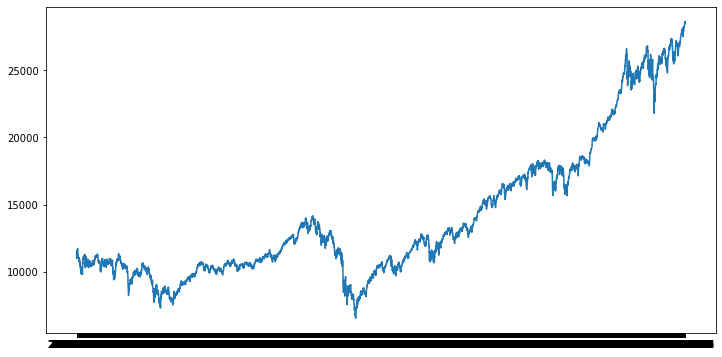

In [14]:
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(DJI_data['Date'], DJI_data['Adj Close'])

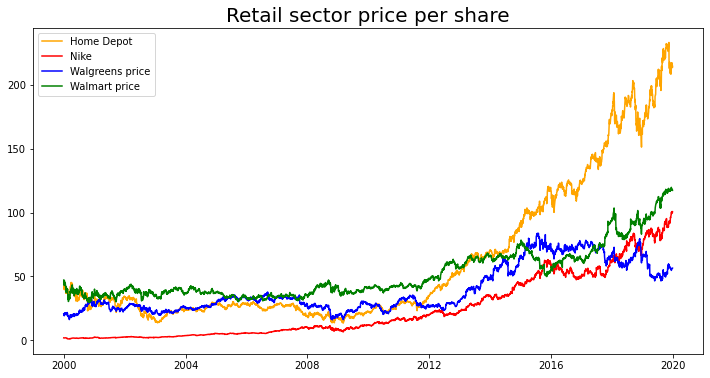

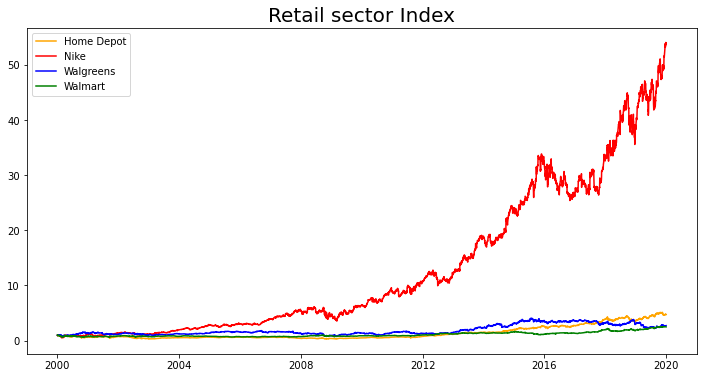

In [15]:
fig1, ax1 = plt.subplots(figsize = (12,6))

ax1.set_title('Retail sector price per share', fontsize=20)
ax1.plot(retail_data['Date'], retail_data['HD price'], label='Home Depot', c='orange')
ax1.plot(retail_data['Date'], retail_data['NKE price'], label='Nike', c='red')
ax1.plot(retail_data['Date'], retail_data['WBA price'], label='Walgreens price', c='blue')
ax1.plot(retail_data['Date'], retail_data['WMT price'], label ='Walmart price', c='green')

ax1.legend()


fig10, ax10 = plt.subplots(figsize = (12,6))

ax10.set_title('Retail sector Index', fontsize=20)
ax10.plot(retail_data['Date'], retail_data['HD index'], label='Home Depot', c='orange')
ax10.plot(retail_data['Date'], retail_data['NKE index'], label='Nike', c='red')
ax10.plot(retail_data['Date'], retail_data['WBA index'], label='Walgreens', c='blue')
ax10.plot(retail_data['Date'], retail_data['WMT index'], label ='Walmart', c='green')

ax10.legend()

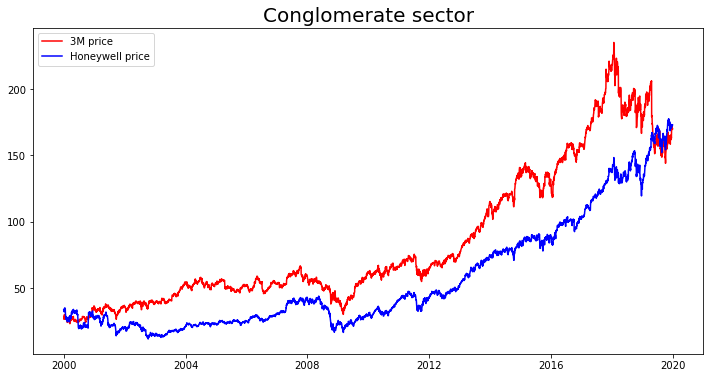

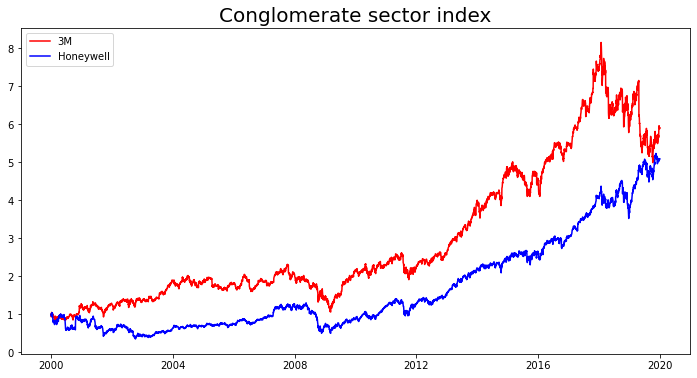

In [16]:
fig2, ax2 = plt.subplots(figsize = (12,6))

ax2.set_title('Conglomerate sector', fontsize=20)
ax2.plot(conglomerate_data['Date'], conglomerate_data['MMM price'], label='3M price', c='red')
ax2.plot(conglomerate_data['Date'], conglomerate_data['HON price'], label ='Honeywell price', c='blue')

ax2.legend()


fig20, ax20 = plt.subplots(figsize = (12,6))

ax20.set_title('Conglomerate sector index', fontsize=20)
ax20.plot(conglomerate_data['Date'], conglomerate_data['MMM index'], label='3M', c='red')
ax20.plot(conglomerate_data['Date'], conglomerate_data['HON index'], label ='Honeywell', c='blue')

ax20.legend()

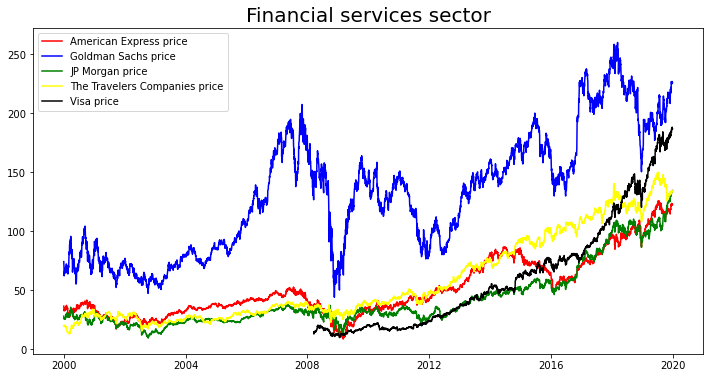

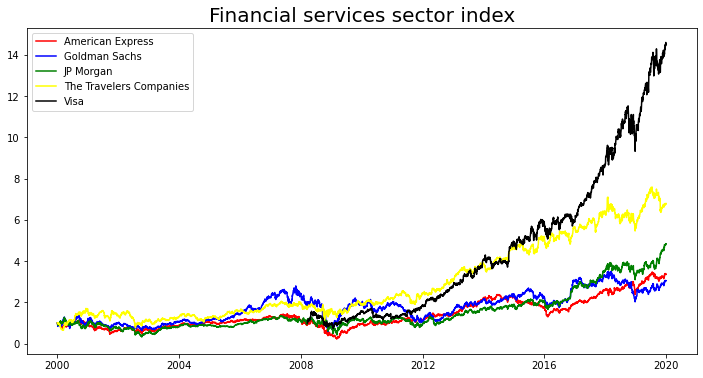

In [17]:
fig3, ax3 = plt.subplots(figsize = (12,6))

ax3.set_title('Financial services sector', fontsize=20)
ax3.plot(finance_data['Date'], finance_data['AXP price'], label='American Express price', c='red')
ax3.plot(finance_data['Date'], finance_data['GS price'], label ='Goldman Sachs price', c='blue')
ax3.plot(finance_data['Date'], finance_data['JPM price'], label='JP Morgan price', c='green')
ax3.plot(finance_data['Date'], finance_data['TRV price'], label='The Travelers Companies price', c='yellow')
ax3.plot(finance_data['Date'], finance_data['V price'], label='Visa price', c='black')

ax3.legend()


fig30, ax30 = plt.subplots(figsize = (12,6))

ax30.set_title('Financial services sector index', fontsize=20)
ax30.plot(finance_data['Date'], finance_data['AXP index'], label='American Express', c='red')
ax30.plot(finance_data['Date'], finance_data['GS index'], label ='Goldman Sachs', c='blue')
ax30.plot(finance_data['Date'], finance_data['JPM index'], label='JP Morgan', c='green')
ax30.plot(finance_data['Date'], finance_data['TRV index'], label='The Travelers Companies', c='yellow')
ax30.plot(finance_data['Date'], finance_data['V index'], label='Visa', c='black')

ax30.legend()

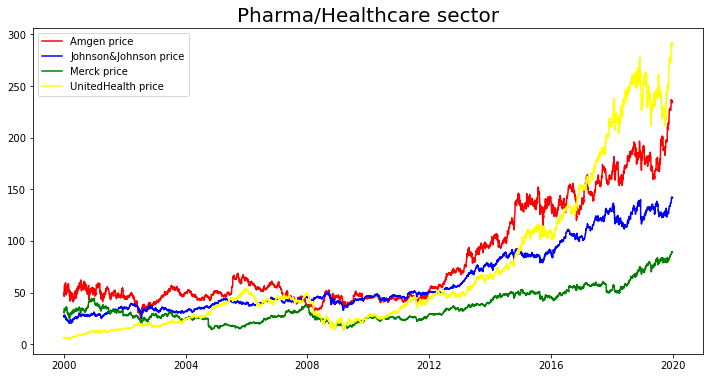

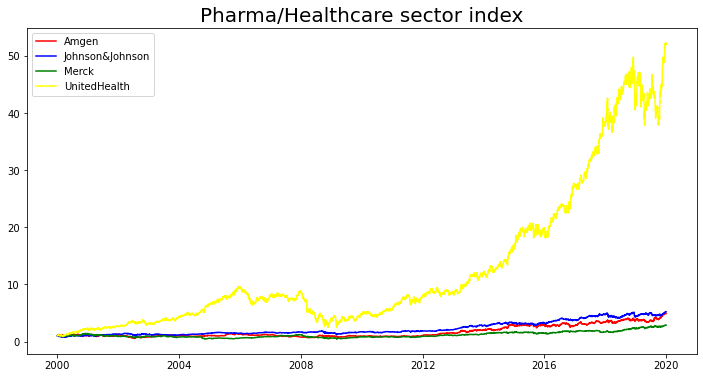

In [18]:
fig4, ax4 = plt.subplots(figsize = (12,6))

ax4.set_title('Pharma/Healthcare sector', fontsize=20)
ax4.plot(pharma_data['Date'], pharma_data['AMGN price'], label='Amgen price', c='red')
ax4.plot(pharma_data['Date'], pharma_data['JNJ price'], label ='Johnson&Johnson price', c='blue')
ax4.plot(pharma_data['Date'], pharma_data['MRK price'], label='Merck price', c='green')
ax4.plot(pharma_data['Date'], pharma_data['UNH price'], label='UnitedHealth price', c='yellow')

ax4.legend()


fig40, ax40 = plt.subplots(figsize = (12,6))

ax40.set_title('Pharma/Healthcare sector index', fontsize=20)
ax40.plot(pharma_data['Date'], pharma_data['AMGN index'], label='Amgen', c='red')
ax40.plot(pharma_data['Date'], pharma_data['JNJ index'], label ='Johnson&Johnson', c='blue')
ax40.plot(pharma_data['Date'], pharma_data['MRK index'], label='Merck', c='green')
ax40.plot(pharma_data['Date'], pharma_data['UNH index'], label='UnitedHealth', c='yellow')

ax40.legend()

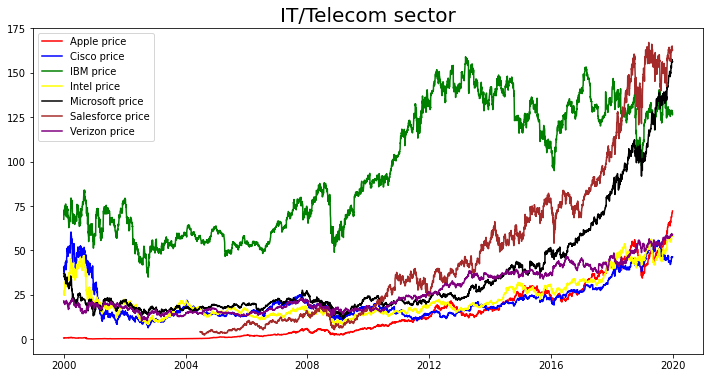

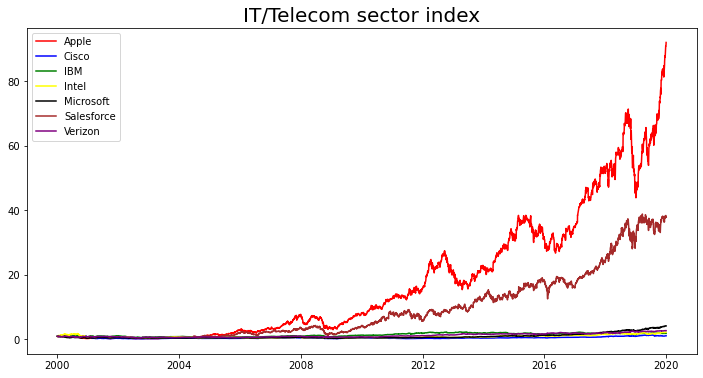

In [19]:
fig5, ax5 = plt.subplots(figsize = (12,6))

ax5.set_title('IT/Telecom sector', fontsize=20)
ax5.plot(it_data['Date'], it_data['AAPL price'], label='Apple price', c='red')
ax5.plot(it_data['Date'], it_data['CSCO price'], label ='Cisco price', c='blue')
ax5.plot(it_data['Date'], it_data['IBM price'], label='IBM price', c='green')
ax5.plot(it_data['Date'], it_data['INTC price'], label='Intel price', c='yellow')
ax5.plot(it_data['Date'], it_data['MSFT price'], label='Microsoft price', c='black')
ax5.plot(it_data['Date'], it_data['CRM price'], label='Salesforce price', c='brown')
ax5.plot(it_data['Date'], it_data['VZ price'], label='Verizon price', c='purple')

ax5.legend()


fig50, ax50 = plt.subplots(figsize = (12,6))

ax50.set_title('IT/Telecom sector index', fontsize=20)
ax50.plot(it_data['Date'], it_data['AAPL index'], label='Apple', c='red')
ax50.plot(it_data['Date'], it_data['CSCO index'], label ='Cisco', c='blue')
ax50.plot(it_data['Date'], it_data['IBM index'], label='IBM', c='green')
ax50.plot(it_data['Date'], it_data['INTC index'], label='Intel', c='yellow')
ax50.plot(it_data['Date'], it_data['MSFT index'], label='Microsoft', c='black')
ax50.plot(it_data['Date'], it_data['CRM index'], label='Salesforce', c='brown')
ax50.plot(it_data['Date'], it_data['VZ index'], label='Verizon', c='purple')

ax50.legend()

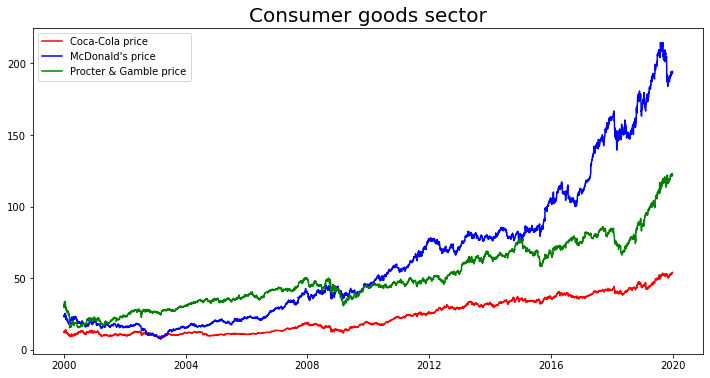

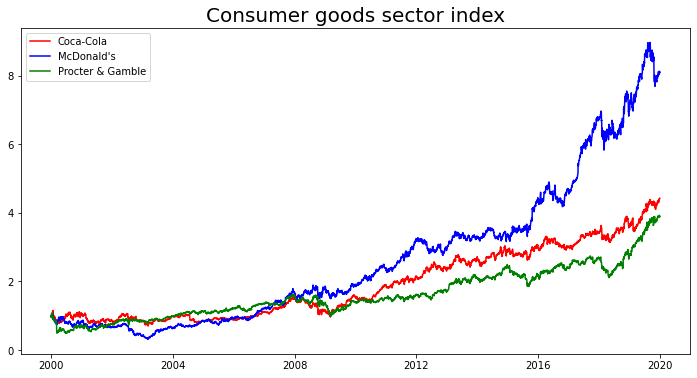

In [20]:
fig6, ax6 = plt.subplots(figsize = (12,6))

ax6.set_title('Consumer goods sector', fontsize=20)
ax6.plot(consumergoods_data['Date'], consumergoods_data['KO price'], label='Coca-Cola price', c='red')
ax6.plot(consumergoods_data['Date'], consumergoods_data['MCD price'], label ="McDonald's price", c='blue')
ax6.plot(consumergoods_data['Date'], consumergoods_data['PG price'], label='Procter & Gamble price', c='green')

ax6.legend()


fig60, ax60 = plt.subplots(figsize = (12,6))

ax60.set_title('Consumer goods sector index', fontsize=20)
ax60.plot(consumergoods_data['Date'], consumergoods_data['KO index'], label='Coca-Cola', c='red')
ax60.plot(consumergoods_data['Date'], consumergoods_data['MCD index'], label ="McDonald's", c='blue')
ax60.plot(consumergoods_data['Date'], consumergoods_data['PG index'], label='Procter & Gamble', c='green')

ax60.legend()

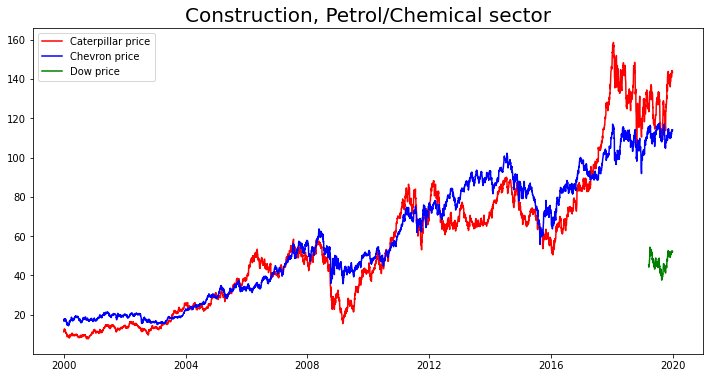

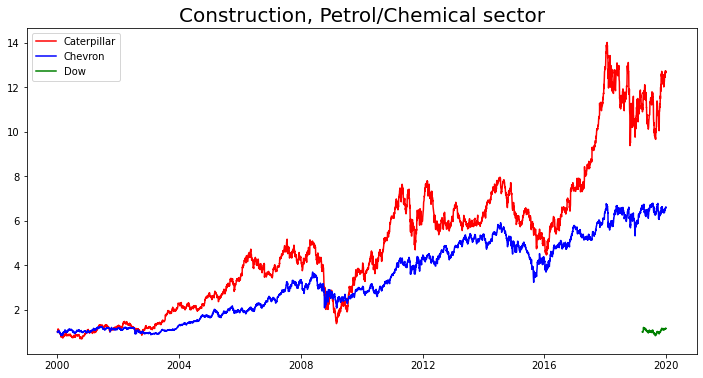

In [21]:
fig7, ax7 = plt.subplots(figsize = (12,6))

ax7.set_title('Construction, Petrol/Chemical sector', fontsize=20)
ax7.plot(construction_data['Date'], construction_data['CAT price'], label='Caterpillar price', c='red')
ax7.plot(construction_data['Date'], construction_data['CVX price'], label ='Chevron price', c='blue')
ax7.plot(construction_data['Date'], construction_data['DOW price'], label='Dow price', c='green')

ax7.legend() 


fig70, ax70 = plt.subplots(figsize = (12,6))

ax70.set_title('Construction, Petrol/Chemical sector', fontsize=20)
ax70.plot(construction_data['Date'], construction_data['CAT index'], label='Caterpillar', c='red')
ax70.plot(construction_data['Date'], construction_data['CVX index'], label ='Chevron', c='blue')
ax70.plot(construction_data['Date'], construction_data['DOW index'], label='Dow', c='green')

ax70.legend()

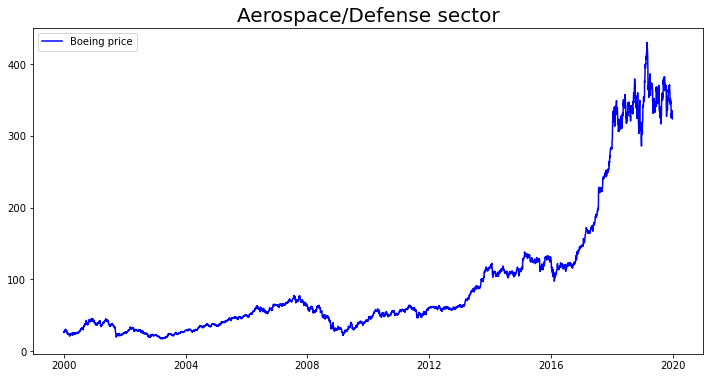

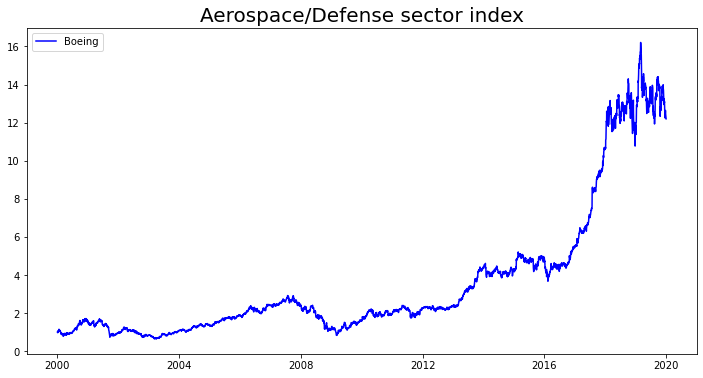

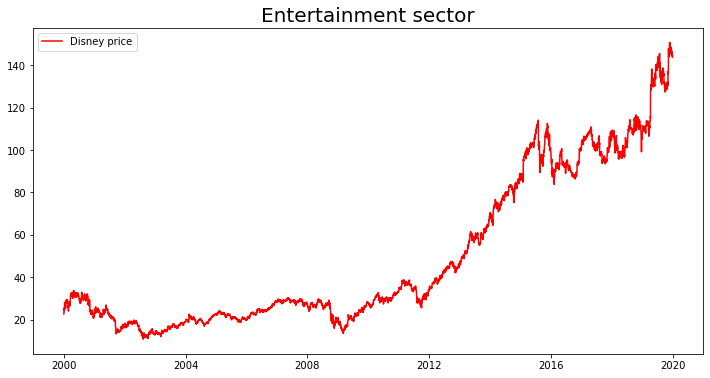

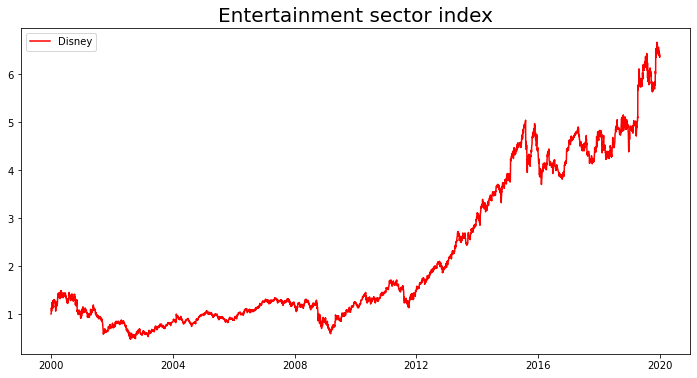

In [22]:
fig8, ax8 = plt.subplots(figsize = (12,6))

ax8.set_title('Aerospace/Defense sector', fontsize=20)
ax8.plot(aero_data['Date'], aero_data['BA price'], label='Boeing price', c='blue')

ax8.legend()


fig80, ax80 = plt.subplots(figsize = (12,6))

ax80.set_title('Aerospace/Defense sector index', fontsize=20)
ax80.plot(aero_data['Date'], aero_data['BA index'], label='Boeing', c='blue')

ax80.legend()


fig9, ax9 = plt.subplots(figsize = (12,6))

ax9.set_title('Entertainment sector', fontsize=20)
ax9.plot(entertainment_data['Date'], entertainment_data['DIS price'], label='Disney price', c='red')

ax9.legend()


fig90, ax90 = plt.subplots(figsize = (12,6))

ax90.set_title('Entertainment sector index', fontsize=20)
ax90.plot(entertainment_data['Date'], entertainment_data['DIS index'], label='Disney', c='red')

ax90.legend()

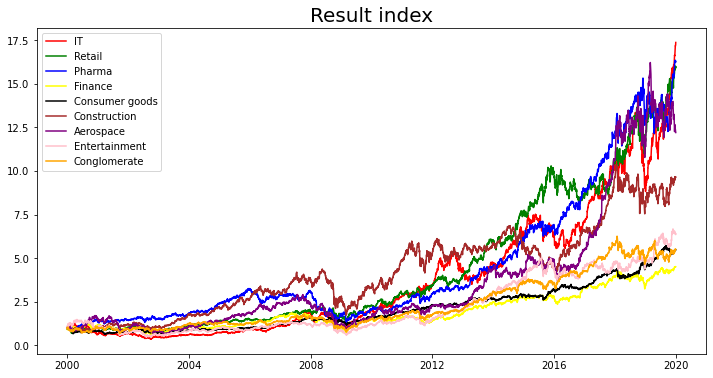

In [23]:

fig11, ax11 = plt.subplots(figsize = (12,6))

ax11.set_title('Result index', fontsize=20)
ax11.plot(it_data['Date'], it_data['Result index'], label='IT', c='red')
ax11.plot(retail_data['Date'], retail_data['Result index'], label='Retail', c='green')
ax11.plot(pharma_data['Date'], pharma_data['Result index'], label='Pharma', c='blue')
ax11.plot(finance_data['Date'], finance_data['Result index'], label='Finance', c='yellow')
ax11.plot(consumergoods_data['Date'], consumergoods_data['Result index'], label='Consumer goods', c='black')
ax11.plot(construction_data['Date'], construction_data['Result index'], label='Construction', c='brown')
ax11.plot(aero_data['Date'], aero_data['BA index'], label='Aerospace', c='purple')
ax11.plot(entertainment_data['Date'], entertainment_data['DIS index'], label='Entertainment', c='pink')
ax11.plot(conglomerate_data['Date'], conglomerate_data['Result index'], label='Conglomerate', c='orange')

ax11.legend()



### Análisis estadístico

In [24]:
# comparar año 2018 con 2019 del DJI. Retorno diario. PCT change.
# ttest independent, filtrar por año
# pvalue y pstatistic

In [27]:
# Cálculo del pct_change diario

DJI_data['Daily return (%)'] = ((DJI_data['Adj Close'].pct_change())*100).round(2)

In [29]:
DJI_data.head(3)

,Date,Adj Close,Daily return (%)
0,2000-01-03,11357.51,NaN
1,2000-01-04,10997.93,-3.17
2,2000-01-05,11122.65,1.13


In [44]:
# Sacar rango/intervalo de todo el 2018.

year_2018 = DJI_data[DJI_data['Date'].str.contains('2018')]

year_2018

,Date,Adj Close,Daily return (%)
4528,2018-01-02,24824.01,0.42
4529,2018-01-03,24922.68,0.40
4530,2018-01-04,25075.13,0.61
4531,2018-01-05,25295.87,0.88
4532,2018-01-08,25283.00,-0.05
...,...,...,...
4774,2018-12-24,21792.20,-2.91
4775,2018-12-26,22878.45,4.98
4776,2018-12-27,23138.82,1.14
4777,2018-12-28,23062.40,-0.33


In [45]:
# Sacar rango/intervalo de todo el 2019.

year_2019 = DJI_data[DJI_data['Date'].str.contains('2019')]

year_2019

,Date,Adj Close,Daily return (%)
4779,2019-01-02,23346.24,0.08
4780,2019-01-03,22686.22,-2.83
4781,2019-01-04,23433.16,3.29
4782,2019-01-07,23531.35,0.42
4783,2019-01-08,23787.45,1.09
...,...,...,...
5026,2019-12-24,28515.45,-0.13
5027,2019-12-26,28621.39,0.37
5028,2019-12-27,28645.26,0.08
5029,2019-12-30,28462.14,-0.64


In [56]:
# Cálculo de los 2 años

stats.ttest_ind(year_2018['Daily return (%)'], year_2019['Daily return (%)'], equal_var=True)

Ttest_indResult(statistic=-1.1539965936833587, pvalue=0.24905175462539494)

In [60]:
#juntar todos los años del 2000 al 2007, 2008-2013, 2014-2019. y ver si los return son distinos.
# ver si el retorno del periodo 1 es mayor al de 2008 al 2019. 1-3, 1-2, 2-3.

In [85]:
# Sacar los 3 intervalos de años. 2000-2007, 2008-2013, 2014-2019

year_2000 = DJI_data[DJI_data['Date'].str.contains(r'200[0-7]')]
year_2008 = DJI_data[DJI_data['Date'].str.contains(r'200[8-9]|201[0-3]')]
year_2014 = DJI_data[DJI_data['Date'].str.contains(r'201[4-9]')]

year_2000['Daily return (%)'] = year_2000['Daily return (%)'].replace(np.nan, 0)

<ipython-input-85-9f9b0c3aef83>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2000['Daily return (%)'] = year_2000['Daily return (%)'].replace(np.nan, 0)


In [112]:

stats.ttest_1samp(year_2018['Daily return (%)'], popmean=0)

Ttest_1sampResult(statistic=-0.23555407251320473, pvalue=0.813971559901062)

In [104]:
# Cálculo de cambio significativo intervalo 2000-2008:

stats.ttest_ind(year_2000['Daily return (%)'], year_2008['Daily return (%)'], equal_var=True)

Ttest_indResult(statistic=-0.2633692713658645, pvalue=0.7922813922572487)

In [80]:
# Cálculo de cambio significativo intervalo 2008-2014:

stats.ttest_ind(year_2008['Daily return (%)'], year_2014['Daily return (%)'], equal_var=False)

Ttest_indResult(statistic=-0.35412403913431384, pvalue=0.7232764300372341)

In [88]:
# Cálculo de cambio significativo intervalo 2000-2014:

stats.ttest_ind(year_2000['Daily return (%)'], year_2014['Daily return (%)'], equal_var=False)

Ttest_indResult(statistic=-0.8049111844497968, pvalue=0.4209253529187833)



- pvalue1 = 0.799
- pvalue2 = 0.723
- pvalue3 = 0.421

**Con los pvalue1,2,3 nos demuestra que no ha existido un cambio significativo de rendimientos periódicos a pesar de la crisis económica del 2008.**

In [ ]:
# Ahora calculamos medias de rendimiento de intervalos. Miramos intervalos y valores por separado.

In [95]:
year_2000['Daily return (%)'].mean()

0.013542288557213908

In [93]:
year_2008['Daily return (%)'].mean()

0.024546657842488426

In [96]:
year_2014['Daily return (%)'].mean()

0.03937748344370862

In [121]:
year_2018['Daily return (%)'].mean()

-0.016772908366533855

In [122]:
year_2019['Daily return (%)'].mean()

0.08313492063492062